<a href="https://colab.research.google.com/github/AlokRanjanSwain/ML-Projects/blob/CNN/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical;


#Loading the CIFAR dataset 
About CIFAR Dataset:

32x32 color photos of 10 classes.

In [2]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
# see loaded dataset shape
print('Train data: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test data: X=%s, y=%s' % (testX.shape, testy.shape))

Train data: X=(50000, 32, 32, 3), y=(50000, 1)
Test data: X=(10000, 32, 32, 3), y=(10000, 1)


As we see there is 50K training data and 10K testing data. And as there is 32x32 colored images. 

Thus the matrix is 50000x32x32x3 (for incorporating 3 color chanels RGB)

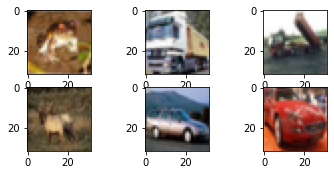

In [4]:
# plot first few images
for i in range(6):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

We can see some of the raw images from the data sets.

Now lets see y matrix/vector.

In [5]:
print("sampleNo || value")
for i in range(6):
    print('%8s %7s' %(i+1,trainy[i]))

sampleNo || value
       1     [6]
       2     [9]
       3     [9]
       4     [4]
       5     [1]
       6     [1]


We can observe that the number (or integer) represents the category of picture, Like 1=Car, 9=truck.
But using the integers it is very difficult to train, as it doesn't convey much information for the machine learning model. So we will convert it to one-hot encoding matrix.
Simply put one-hot encoding will binarize each category. i.e 1 category will be represented as vector of zero and ones.
Suppose there are 2 class then one-hot encoding will be ```[0 1] [1 0]```. 

It could be easily done using inbuilt function.
```
from keras.utils import to_categorical;
# one hot encode target values
trainY = to_categorical(trainy)
testY = to_categorical(testy)
```



 


    



# Normalization of input Data
The images is stored in pixel with value ranging between 0-255. Thus we need to normalize it before training. The need for normalization is because it will make every values in between the same reason [0-1]. It will make training simpler as there will low variation between the features of training variable. For unsderstanding you can assume if one feature ranges between 0-10, and another feature reanges between  0-1000, It will be difficult gfor ML model to learn the pattern.
```
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
```
#Load Dataset function
Now let's define a function which will provide appropriate dataset to us. 
```
def datasetCifar():
    # load cifar data
    (train_X, train_Y), (test_X, test_Y) = cifar10.load_data()
    
    # Normalize X matrix
    train_norm = train_X.astype('float32')/255.0
    test_norm = test_X.astype('float32')/255.0
    
    # one hot encoding vector
    trainY = to_categorical(train_Y)
    testY = to_categorical(test_Y)
    
    return train_norm, trainY, test_norm, testY
```    

# Machine Learning Model
Now let's define Our keras model. We will be using deep networks in our model.

In keras if there is one input (& output) tensor (or vector), we can initiate the model as sequential, which will tell us that model is just plain stack of layers. We can then define the layers either at the time of initialization or at later stage. 
```
model = Sequential()
```
# Convolution Layer
Now lets define 1 convolution layer inside it.
```
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
```
Before we go further, let's see what all the variable means. 
1. Conv2D is the convolution filter with size of 3x3, and 32 in number.
2. Activation function is used to incorporate non-linearity in the learning function.
3. kernel_initializer is the intialization of the filters weights.
4. padding is same, means the output layer will be of same shape of the input.

#Batch Normalization
We then add batch normalization layer. It is added to keep the input for the second (deep) layer normalize. It helps in learning performance of the neural networks. It also acts as regularizer.
```
model.add(BatchNormalization())
```

#Pooling Layer
We then add max-pooling layer. Above (2,2) is the pooling window size. 
Pooling layer are used to reduce the number of features (i.e it is used to reduce the number of parameters to learn for the ML model). It also captures the information for the feature map.  
There are two types of pooling used:
1. Max pooling: takes maximum of elements present in the pooling window
2. Average Pooling: takes average of the elements in the pooling window


```
model.add(MaxPooling2D((2, 2)))
```
#Dropout
Dropout is used for regularization to decrease overfitting. In deep neural networks there is high chances of overfitting i.e model will predict will great on trained (seen) dataset, but very low for unseen (test) datasets. In dropout we drop out some units on that NN layer. Here 0.2 means around 20% of units in the neural networks (NN) layer will be droped out. That means out of supposedly 100 units of that NN layer only 80 will remain for that itteration. The dropped out units are random in nature. 
```
model.add(Dropout(0.2))
```
#Flatten
After multiple convolution layers alongside, pooling layers, normalization and dropout, finally we need a flatten to pass it to next layer ANN.
```
model.add(Flatten())
```
Now adding a dense layer of 128 units. 
```
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
```
Remember we have 10 classes, thus we need to add last layer with 10 units and softmax activation.
```
model.add(Dense(10, activation='softmax'))
```
#Optimization
Before moving forward we should know about optimization techniques to be used. As this is a supervised learning, meaning we already have the result for each images, thus in optimzation, we need to minimize the cost function to find the accurate ML model with the lowest cost. 
The cost (loss) function used is cross entropy function and the optimization used is stochastic gradient descent (SGD)
```
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
```

Here lr is learning rate, means factor by which parameters are updated.
metrics used is accuracy

Now let's define our model
```
def defineModel():
    
    model = Sequential()
    # 1st Conv layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    # 2nd Conv layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    # 3rd Conv Layer
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    # 4th Conv layer
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    # 5th Conv layer
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    # 6th Conv layer
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    #Flatten the conv layer
    model.add(Flatten())
    # add the dense layer
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    # Final layer
    model.add(Dense(10, activation='softmax'))
    # optimizer
    opt = SGD(lr=0.001, momentum=0.9)
    # Model compile
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    
```

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [7]:
def datasetCifar():
    # load cifar data
    (train_X, train_Y), (test_X, test_Y) = cifar10.load_data()
    
    # Normalize X matrix
    train_norm = train_X.astype('float32')/255.0
    test_norm = test_X.astype('float32')/255.0
    
    # one hot encoding vector
    trainY = to_categorical(train_Y)
    testY = to_categorical(test_Y)
    
    return train_norm, trainY, test_norm, testY
    

In [8]:
def defineModel():
    
    model = Sequential()
    # 1st Conv layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    # 2nd Conv layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    # 3rd Conv Layer
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    # 4th Conv layer
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    # 5th Conv layer
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    # 6th Conv layer
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    #Flatten the conv layer
    model.add(Flatten())
    # add the dense layer
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    # Final layer
    model.add(Dense(10, activation='softmax'))
    # optimizer
    opt = SGD(learning_rate=0.001, momentum=0.9)
    # Model compile
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
def execute():
    # Getting the data set
    trainX, trainY, testX, testY = datasetCifar()
    
    # Get model 
    model = defineModel()
    
    # Training the model
    history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)

    # Save the model
    model.save("basicCNN.h5")
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    # print('Accuracy is : %.3f' % (acc * 100.0))
    return history,acc

In [21]:
def showPlotsLoss(history):
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    pyplot.legend()


In [18]:
def showPlotsAcc(history):
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.legend()

In [15]:
hist,ac=execute()
print('Accuracy is : %.3f' % (ac * 100.0))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Accuracy is : 84.960


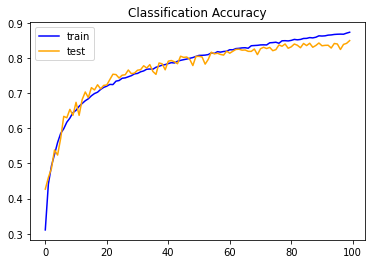

In [24]:
showPlotsAcc(hist)

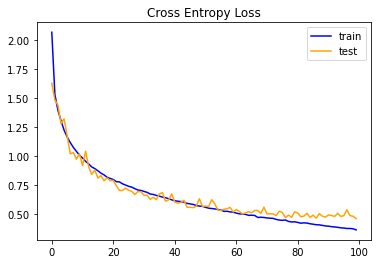

In [23]:
   showPlotsLoss(hist)

We have seen the accuracy and loss graph for the model